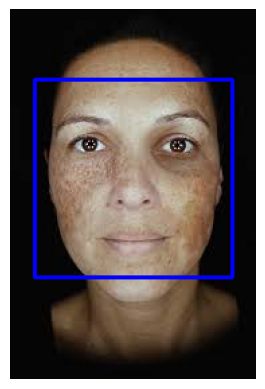

In [10]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = r'C:\Users\shamb\Downloads\images.jfif'  # Using raw string to handle backslashes
image = cv2.imread(image_path)

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Save the output image
output_path = r'C:\Users\shamb\Downloads\output_image.jpg'  # Using raw string to handle backslashes
cv2.imwrite(output_path, image)

# Convert the image from BGR to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axes
plt.show()


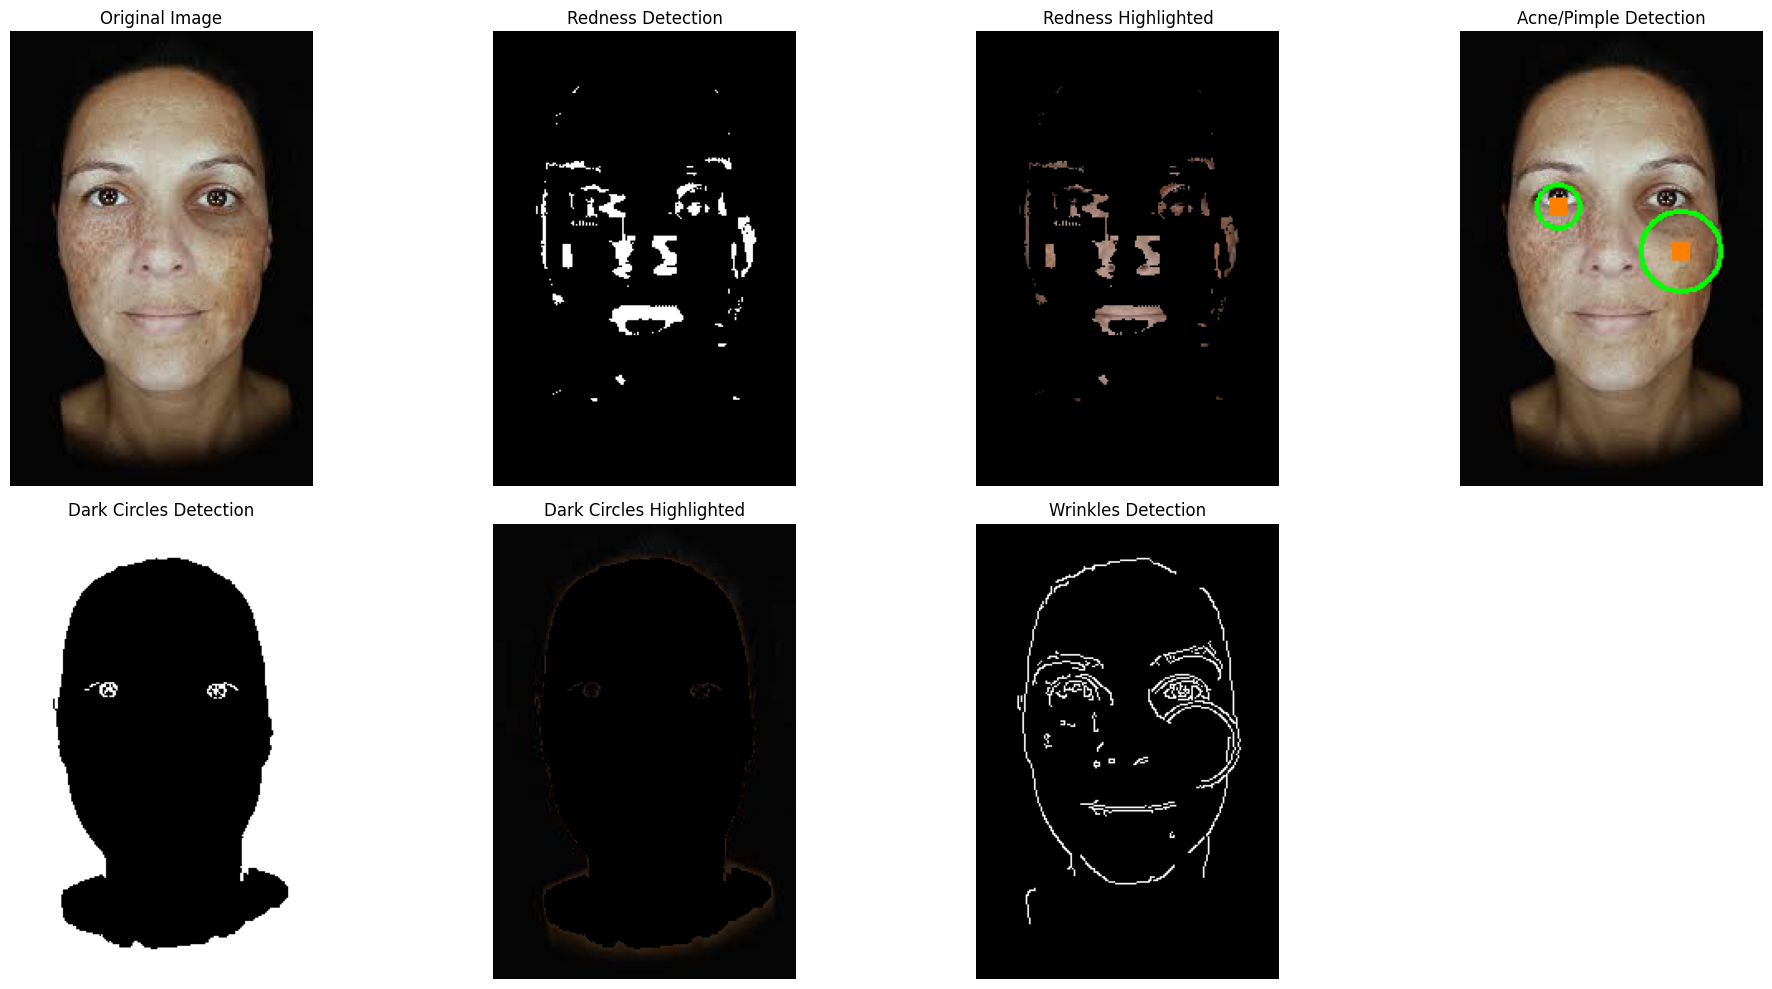

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r'C:\Users\shamb\Downloads\images.jfif'
image = cv2.imread(image_path)

# Convert image to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range for detecting redness (HSV color space)
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])

# Create a mask to detect redness
mask_red = cv2.inRange(hsv_image, lower_red, upper_red)

# Apply the mask to the original image
result_red = cv2.bitwise_and(image, image, mask=mask_red)

# Convert the mask and result to RGB for display
mask_red_rgb = cv2.cvtColor(mask_red, cv2.COLOR_GRAY2RGB)
result_red_rgb = cv2.cvtColor(result_red, cv2.COLOR_BGR2RGB)

# Define the range for detecting dark circles (HSV color space)
lower_dark_circles = np.array([0, 0, 0])
upper_dark_circles = np.array([180, 255, 50])

# Create a mask to detect dark circles
mask_dark_circles = cv2.inRange(hsv_image, lower_dark_circles, upper_dark_circles)

# Apply the mask to the original image
result_dark_circles = cv2.bitwise_and(image, image, mask=mask_dark_circles)

# Convert the mask and result to RGB for display
mask_dark_circles_rgb = cv2.cvtColor(mask_dark_circles, cv2.COLOR_GRAY2RGB)
result_dark_circles_rgb = cv2.cvtColor(result_dark_circles, cv2.COLOR_BGR2RGB)

# Pimple/Acne Detection
# Convert the result to grayscale
gray_result = cv2.cvtColor(result_red, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve contour detection
blurred_result = cv2.GaussianBlur(gray_result, (5, 5), 0)

# Detect circles (which could be pimples/acne) using HoughCircles
circles = cv2.HoughCircles(blurred_result, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=5, maxRadius=50)

# Draw circles on the image
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(image, (x, y), r, (0, 255, 0), 2)  # Draw circle in green
        cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)  # Draw center of circle in orange

# Wrinkle Detection
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use Canny edge detector to detect edges (which can highlight wrinkles)
edges = cv2.Canny(gray_image, 100, 200)

# Convert edges to RGB for display
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

# Plot the images
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(mask_red_rgb)
plt.title('Redness Detection')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(result_red_rgb)
plt.title('Redness Highlighted')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Acne/Pimple Detection')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(mask_dark_circles_rgb)
plt.title('Dark Circles Detection')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(result_dark_circles_rgb)
plt.title('Dark Circles Highlighted')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(edges_rgb)
plt.title('Wrinkles Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


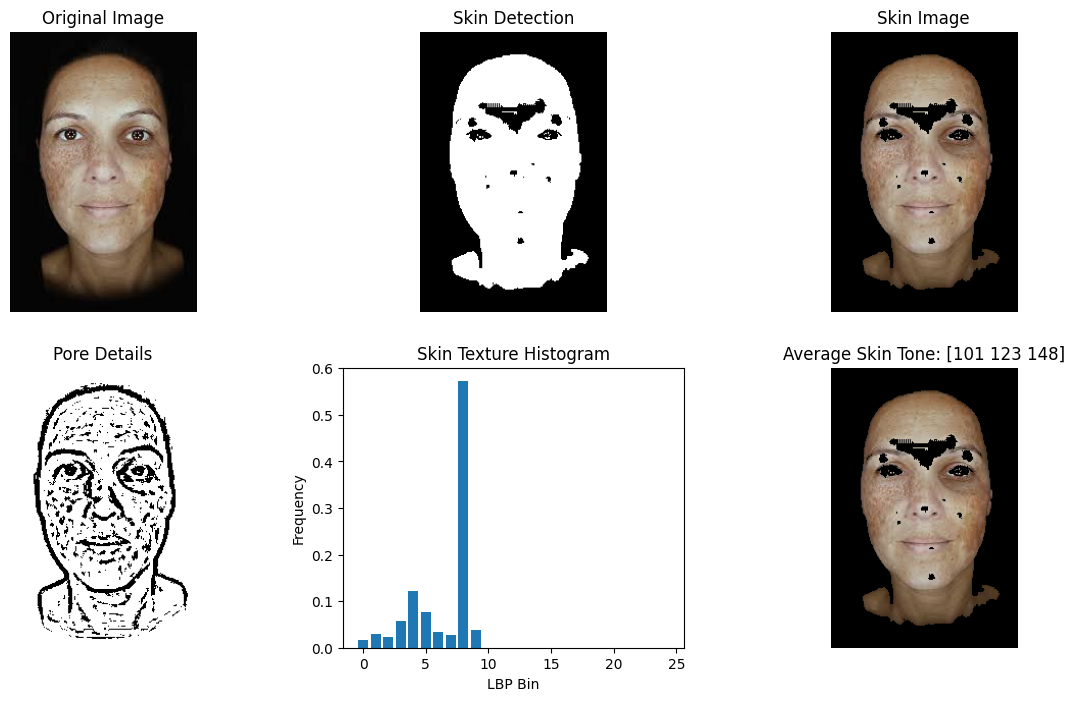

Average Skin Tone (BGR): [101 123 148]
Skin Texture Histogram: [0.01621461 0.030462   0.02322901 0.0584004  0.12137109 0.0777546
 0.03324391 0.02837556 0.57247889 0.03846995 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r'C:\Users\shamb\Downloads\images.jfif'
image = cv2.imread(image_path)

# Convert image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range for detecting skin color (HSV color space)
lower_skin = np.array([0, 20, 70])
upper_skin = np.array([20, 255, 255])

# Create a mask to detect skin regions
mask_skin = cv2.inRange(hsv_image, lower_skin, upper_skin)
skin_image = cv2.bitwise_and(image, image, mask=mask_skin)

# Calculate average skin tone
skin_pixels = skin_image[mask_skin > 0]
average_skin_tone = np.mean(skin_pixels, axis=0)

# Convert the mask to RGB for display
mask_skin_rgb = cv2.cvtColor(mask_skin, cv2.COLOR_GRAY2RGB)
skin_image_rgb = cv2.cvtColor(skin_image, cv2.COLOR_BGR2RGB)

# Calculate skin texture using LBP (Local Binary Pattern)
from skimage.feature import local_binary_pattern

# Convert the skin region to grayscale
gray_skin_image = cv2.cvtColor(skin_image, cv2.COLOR_BGR2GRAY)

# Calculate LBP
lbp = local_binary_pattern(gray_skin_image, P=8, R=1, method='uniform')

# Calculate LBP histogram
hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 26), range=(0, 25))
hist = hist.astype('float')
hist /= (hist.sum() + 1e-6)  # Normalize histogram

# Pore detection: Enhance details and detect small features
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
pore_mask = cv2.medianBlur(gray_image, 5)  # Reduce noise
pore_mask = cv2.adaptiveThreshold(pore_mask, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Convert pore mask to RGB for display
pore_mask_rgb = cv2.cvtColor(pore_mask, cv2.COLOR_GRAY2RGB)

# Plot the images
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(mask_skin_rgb)
plt.title('Skin Detection')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(skin_image_rgb)
plt.title('Skin Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(pore_mask_rgb)
plt.title('Pore Details')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.bar(range(len(hist)), hist)
plt.title('Skin Texture Histogram')
plt.xlabel('LBP Bin')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(skin_image, cv2.COLOR_BGR2RGB))
plt.title(f'Average Skin Tone: {average_skin_tone.astype(int)}')
plt.axis('off')

plt.show()

print(f"Average Skin Tone (BGR): {average_skin_tone.astype(int)}")
print(f"Skin Texture Histogram: {hist}")




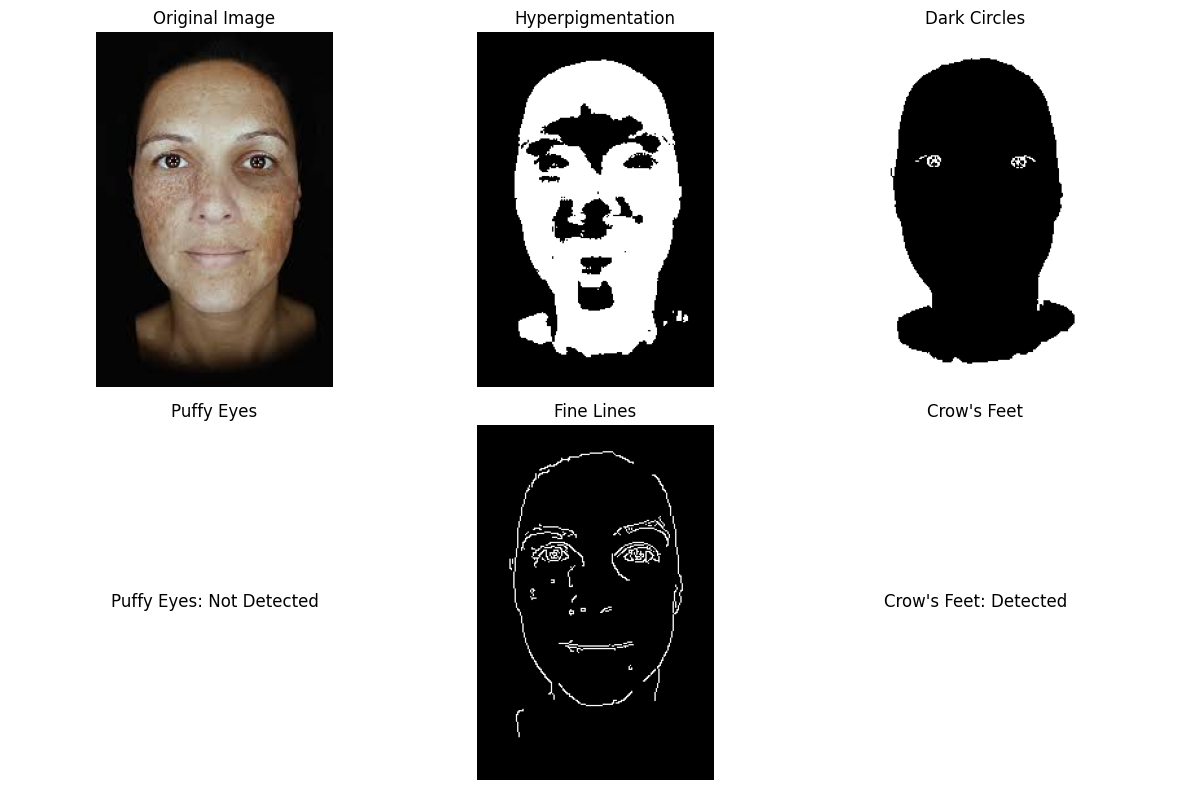

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r'C:\Users\shamb\Downloads\images.jfif'
image = cv2.imread(image_path)

# Convert image to RGB and HSV
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Function to detect specific skin concerns
def detect_features(image, hsv_image):
    concerns = {}

    # Hyperpigmentation detection using HSV range
    lower_hyperpigmentation = np.array([0, 50, 80])
    upper_hyperpigmentation = np.array([20, 255, 255])
    mask_hyperpigmentation = cv2.inRange(hsv_image, lower_hyperpigmentation, upper_hyperpigmentation)
    concerns['Hyperpigmentation'] = mask_hyperpigmentation
    
    # Dark Circles detection using HSV range
    lower_dark_circles = np.array([0, 0, 0])
    upper_dark_circles = np.array([180, 255, 50])
    mask_dark_circles = cv2.inRange(hsv_image, lower_dark_circles, upper_dark_circles)
    concerns['Dark Circles'] = mask_dark_circles
    
    # Puffy Eyes detection using image difference
    blurred_image = cv2.GaussianBlur(image, (15, 15), 0)
    diff_image = cv2.absdiff(image, blurred_image)
    puffy_eyes = np.mean(diff_image) > 50  # Example threshold
    concerns['Puffy Eyes'] = puffy_eyes
    
    # Fine Lines and Crow's Feet detection using edge detection
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, 100, 200)
    concerns['Fine Lines'] = edges
    concerns['Crow\'s Feet'] = np.sum(edges) > 1000  # Example threshold for visualization
    
    # Placeholder for Skin Elasticity Loss, Firmness Reduction
    concerns['Skin Elasticity Loss'] = False  # Placeholder
    concerns['Firmness Reduction'] = False    # Placeholder
    
    # Skin Dullness and Uneven Skin Tone detection
    average_skin_tone = np.mean(image, axis=(0, 1))
    concerns['Skin Dullness'] = np.mean(average_skin_tone) < 100  # Example threshold
    concerns['Uneven Skin Tone'] = np.std(average_skin_tone) > 20  # Example threshold
    
    return concerns

# Feature detection
detected_features = detect_features(image, hsv_image)

# Function to visualize detected features
def visualize_detection(image, detected_features):
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    # Visualize Hyperpigmentation
    plt.subplot(2, 3, 2)
    plt.imshow(detected_features['Hyperpigmentation'], cmap='gray')
    plt.title('Hyperpigmentation')
    plt.axis('off')
    
    # Visualize Dark Circles
    plt.subplot(2, 3, 3)
    plt.imshow(detected_features['Dark Circles'], cmap='gray')
    plt.title('Dark Circles')
    plt.axis('off')
    
    # Visualize Puffy Eyes
    plt.subplot(2, 3, 4)
    puffy_eyes_text = 'Detected' if detected_features['Puffy Eyes'] else 'Not Detected'
    plt.text(0.5, 0.5, f'Puffy Eyes: {puffy_eyes_text}', fontsize=12, horizontalalignment='center', verticalalignment='center')
    plt.title('Puffy Eyes')
    plt.axis('off')
    
    # Visualize Fine Lines (Edge Detection)
    plt.subplot(2, 3, 5)
    plt.imshow(detected_features['Fine Lines'], cmap='gray')
    plt.title('Fine Lines')
    plt.axis('off')
    
    # Visualize Crow's Feet
    plt.subplot(2, 3, 6)
    crows_feet_text = 'Detected' if detected_features['Crow\'s Feet'] else 'Not Detected'
    plt.text(0.5, 0.5, f'Crow\'s Feet: {crows_feet_text}', fontsize=12, horizontalalignment='center', verticalalignment='center')
    plt.title('Crow\'s Feet')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize the detected features
visualize_detection(image, detected_features)


Found 878 images belonging to 4 classes.
Found 219 images belonging to 4 classes.
Found 288 images belonging to 4 classes.


c:\Users\shamb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 74, 74, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,764 (18.42 MB)

 Trainable params: 4,829,316 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20


c:\Users\shamb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5435 - loss: 7.1056 - val_accuracy: 0.7604 - val_loss: 3.2547
Epoch 2/20
 1/27 ━━━━━━━━━━━━━━━━━━━━ 18s 727ms/step - accuracy: 0.5625 - loss: 11.6529

c:\Users\shamb\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5625 - loss: 11.6529 - val_accuracy: 0.8148 - val_loss: 2.6427
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 24s 841ms/step - accuracy: 0.6519 - loss: 6.0222 - val_accuracy: 0.7656 - val_loss: 3.0723
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6562 - loss: 7.1751 - val_accuracy: 0.7778 - val_loss: 1.7474
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 24s 854ms/step - accuracy: 0.6583 - loss: 5.9492 - val_accuracy: 0.7708 - val_loss: 1.8148
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6562 - loss: 4.4042 - val_accuracy: 0.7407 - val_loss: 1.7358
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 26s 886ms/step - accuracy: 0.6671 - loss: 2.9834 - val_accuracy: 0.5729 - val_loss: 0.9527
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7143 - loss: 2.2644 - val_accuracy: 0.5926 - val_loss: 1.0250
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 24s 838ms/step - accuracy: 0.6396 - loss: 3.0055 - val_accuracy: 0.7760 - val_lo

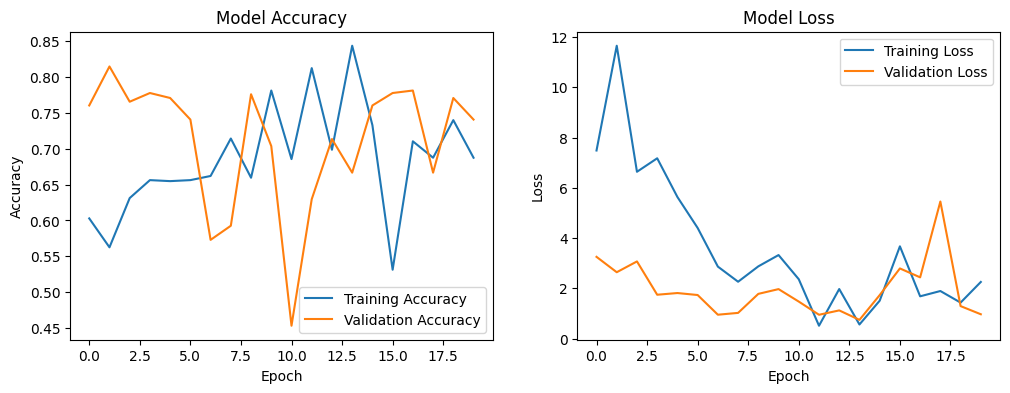

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define paths
train_dir = r"C:\Users\shamb\Downloads\archive (19)\Dataset\train"
test_dir = r"C:\Users\shamb\Downloads\archive (19)\Dataset\test"

# Image size and batch size
img_height, img_width = 150, 150
batch_size = 32

# Data augmentation and loading
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of training data for validation
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes: acne, eczema, psoriasis, seborrheic keratoses
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=20
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

# Save the model after training
model.save('skin_condition_detector.h5')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Detected: Acne with confidence: 87.71%


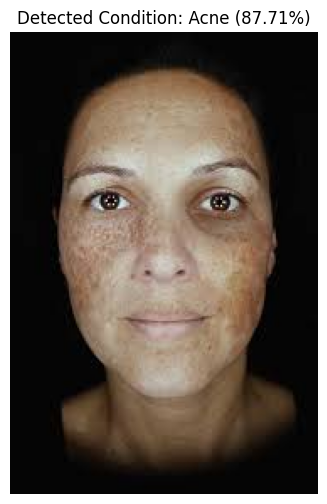

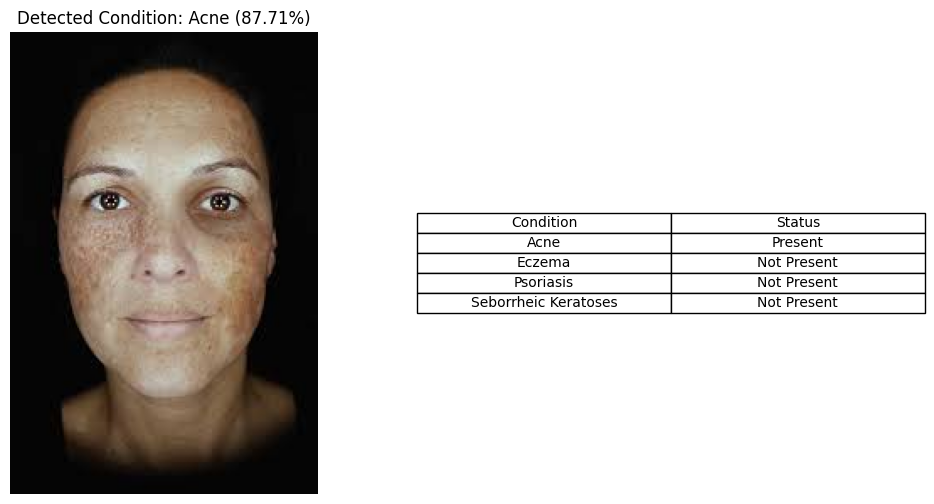

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load the trained model
model_path = r'C:\Users\shamb\Desktop\skin_care\skin_condition_detector.h5'
skin_condition_model = load_model(model_path)

# Define labels corresponding to the classes
class_labels = ['Acne', 'Eczema', 'Psoriasis', 'Seborrheic Keratoses']

# Load the input image for analysis
image_path = r'C:\Users\shamb\Downloads\images.jfif'
image = cv2.imread(image_path)

# Preprocess the image for CNN model
def preprocess_image(image):
    img = cv2.resize(image, (150, 150))  # Resize to match input size of model
    img = img_to_array(img)  # Convert image to array
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize pixel values
    return img

# Function to detect skin conditions using CNN
def detect_skin_conditions(image, model, class_labels):
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]
    confidence = np.max(prediction)
    return predicted_label, confidence, prediction

# Perform detection
detected_label, confidence, predictions = detect_skin_conditions(image, skin_condition_model, class_labels)
print(f'Detected: {detected_label} with confidence: {confidence * 100:.2f}%')

# Visualize the original image and detection result
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f'Detected Condition: {detected_label} ({confidence * 100:.2f}%)')
plt.axis('off')
plt.show()

# Function to visualize the detection result with table
def visualize_detection_with_table(image, detected_label, confidence, class_labels, predictions):
    # Create a new figure
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Show the image with detection result
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title(f'Detected Condition: {detected_label} ({confidence * 100:.2f}%)')
    ax[0].axis('off')
    
    # Prepare data for the table
    present_or_not = ["Present" if prob > 0.5 else "Not Present" for prob in predictions[0]]
    table_data = list(zip(class_labels, present_or_not))
    
    # Create table
    table = ax[1].table(cellText=table_data, colLabels=["Condition", "Status"], cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    
    ax[1].axis('off')  # Hide the axis for the table
    plt.show()

# Visualize the detection result with table
visualize_detection_with_table(image, detected_label, confidence, class_labels, predictions)


In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from fpdf import FPDF

# Create a PDF report
pdf = FPDF()

# Add a title page
pdf.add_page()
pdf.set_font("Arial", size=24)
pdf.cell(0, 10, "Facial Image Analysis Report", 0, 1, "C")
pdf.ln(10)

# Add a section for original image
pdf.add_page()
pdf.set_font("Arial", size=18)
pdf.cell(0, 10, "Original Image", 0, 1, "C")
pdf.ln(10)
pdf.image("output1.png", x=10, y=50, w=100)  # add the original image
pdf.ln(10)

# Add a section for skin condition detection
pdf.add_page()
pdf.set_font("Arial", size=18)
pdf.cell(0, 10, "Skin Condition Detection", 0, 1, "C")
pdf.ln(10)
pdf.image("output2.png", x=10, y=50, w=100)  # add the skin condition detection image
pdf.ln(10)

# Add a section for skin texture analysis
pdf.add_page()
pdf.set_font("Arial", size=18)
pdf.cell(0, 10, "Skin Texture Analysis", 0, 1, "C")
pdf.ln(10)
pdf.image("output3.png", x=10, y=50, w=100)  # add the skin texture analysis image
pdf.ln(10)

# Add a section for facial feature detection
pdf.add_page()
pdf.set_font("Arial", size=18)
pdf.cell(0, 10, "Facial Feature Detection", 0, 1, "C")
pdf.ln(10)
pdf.image("output4.png", x=10, y=50, w=100)  # add the facial feature detection image
pdf.ln(10)

# Add a section for acne detection and classification
pdf.add_page()
pdf.set_font("Arial", size=18)
pdf.cell(0, 10, "Acne Detection and Classification", 0, 1, "C")
pdf.ln(10)
pdf.image("output5.png", x=10, y=50, w=100)  # add the acne detection and classification image
pdf.ln(10)

# Draw a conclusion
pdf.add_page()
pdf.set_font("Arial", size=18)
pdf.cell(0, 10, "Conclusion", 0, 1, "C")
pdf.ln(10)
pdf.set_font("Arial", size=12)
pdf.cell(0, 10, "Based on the analysis, the following conclusions can be drawn:", 0, 1)
pdf.ln(10)
pdf.cell(0, 10, "The original image shows the facial features of the individual.", 0, 1)
pdf.ln(10)
pdf.cell(0, 10, "The skin condition detection reveals the presence of redness, wrinkles, pimples, and dark circles.", 0, 1)
pdf.ln(10)
pdf.cell(0, 10, "The skin texture analysis shows the texture and histogram of the skin.", 0, 1)
pdf.ln(10)
pdf.cell(0, 10, "The facial feature detection detects hyperpigmentation, puffy eyes, and crow's feet.", 0, 1)
pdf.ln(10)
pdf.cell(0, 10, "The acne detection and classification shows the presence of acne and its classification.", 0, 1)
pdf.ln(10)

# Save the PDF report
pdf.output("facial_image_analysis_report.pdf", "F")

print("Report generated successfully!")

Report generated successfully!


In [2]:
import cv2
import numpy as np
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.units import inch

# Define the product recommendations
product_recommendations = {
    "Skin Texture Improvement": [
        "Paula's Choice 2% BHA Liquid Exfoliant",
        "The Ordinary Glycolic Acid 7% Toning Solution",
        "Neutrogena Rapid Wrinkle Repair Retinol Oil"
    ],
    "Skin Tone Improvement": [
        "SkinCeuticals C E Ferulic",
        "The Ordinary Niacinamide 10% + Zinc 1%",
        "Olay Luminous Tone Perfecting Cream"
    ],
    "Improved Pore Details": [
        "La Roche-Posay Effaclar Purifying Foaming Gel",
        "Aztec Secret Indian Healing Clay",
        "Paula's Choice 2% BHA Liquid Exfoliant"
    ],
    "Puffy Eyes": [
        "The Ordinary Caffeine Solution 5% + EGCG",
        "Kiehl’s Creamy Eye Treatment with Avocado",
        "Clinique All About Eyes"
    ],
    "Hyperpigmentation": [
        "Murad Rapid Age Spot and Pigment Lightening Serum",
        "The Ordinary Alpha Arbutin 2% + HA",
        "Obagi Nu-Derm Clear Fx"
    ],
    "Fine Lines": [
        "RoC Retinol Correxion Deep Wrinkle Night Cream",
        "Olay Regenerist Micro-Sculpting Cream",
        "The Ordinary Buffet"
    ],
    "Dark Circles": [
        "Dermalogica Stress Positive Eye Lift",
        "CeraVe Skin Renewing Vitamin C Serum",
        "Kiehl’s Powerful-Strength Line-Reducing Eye-Brightening Concentrate"
    ],
    "Crow’s Feet": [
        "Neutrogena Hydro Boost Eye Gel-Cream",
        "RoC Retinol Correxion Eye Cream",
        "Murad Retinol Youth Renewal Eye Serum"
    ],
    "Acne": [
        "Differin Adapalene Gel 0.1% Acne Treatment",
        "La Roche-Posay Effaclar Duo Acne Treatment",
        "The Ordinary Salicylic Acid 2% Solution"
    ],
    "Eczema": [
        "CeraVe Moisturizing Cream",
        "Eucerin Eczema Relief Body Cream",
        "Aveeno Eczema Therapy Moisturizing Cream"
    ],
    "Psoriasis": [
        "Otezla (Prescription)",
        "T-Gel Therapeutic Shampoo",
        "CeraVe Psoriasis Cream"
    ],
    "Seborrheic Keratoses": [
        "SkinCeuticals Phloretin CF",
        "Obagi Nu-Derm Clear Fx (for uneven skin texture)"
    ],
    "Redness": [
        "La Roche-Posay Rosaliac AR Intense",
        "Paula’s Choice Calm Redness Relief Serum",
        "Avene Antirougeurs Redness-Relief Soothing Cream"
    ],
    "Pimple": [
        "Mario Badescu Drying Lotion",
        "The Ordinary Salicylic Acid 2% Solution",
        "Aztec Secret Indian Healing Clay"
    ],
    "Wrinkle": [
        "RoC Retinol Correxion Deep Wrinkle Night Cream",
        "Olay Regenerist Retinol 24 Night Moisturizer",
        "The Ordinary Buffet"
    ]
}

# Function to generate PDF report with recommendations
def generate_pdf_report(detected_issues):
    pdf_path = r'C:\Users\shamb\Desktop\skin_care\facial_image_analysis_report.pdf'
    
    c = canvas.Canvas(pdf_path, pagesize=letter)
    width, height = letter
    
    # Title
    c.setFont("Helvetica-Bold", 16)
    c.drawString(1 * inch, height - 1 * inch, "Facial Image Analysis Report")
    
    # Recommendations
    y_position = height - 2 * inch
    for issue in detected_issues:
        if issue in product_recommendations:
            c.setFont("Helvetica-Bold", 12)
            c.drawString(1 * inch, y_position, issue)
            y_position -= 0.2 * inch
            c.setFont("Helvetica", 10)
            for product in product_recommendations[issue]:
                c.drawString(1.2 * inch, y_position, f"- {product}")
                y_position -= 0.2 * inch
        y_position -= 0.4 * inch

    c.save()

# Example detected issues
detected_issues = ["Skin Texture Improvement", "Puffy Eyes", "Acne"]

# Generate the PDF with product recommendations
generate_pdf_report(detected_issues)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


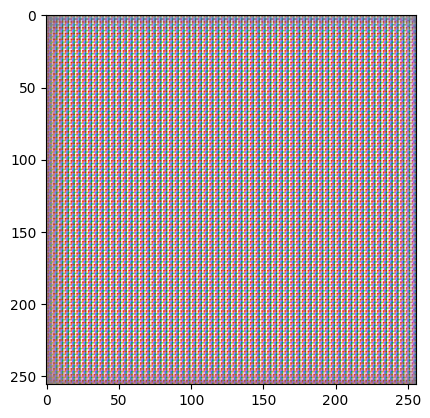

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


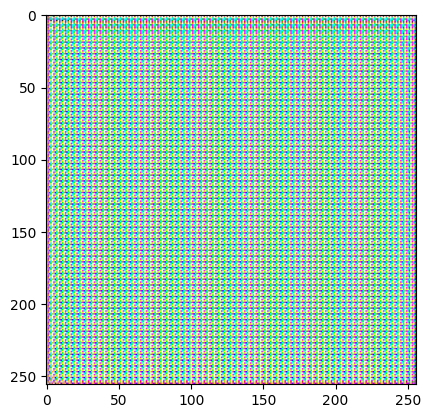

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


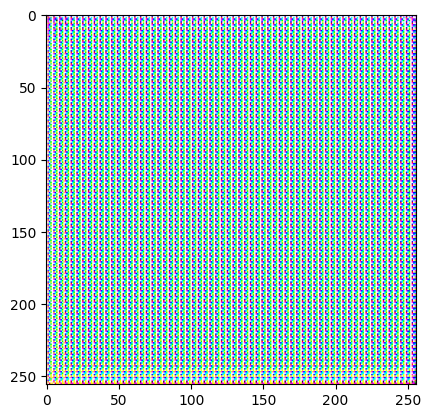

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


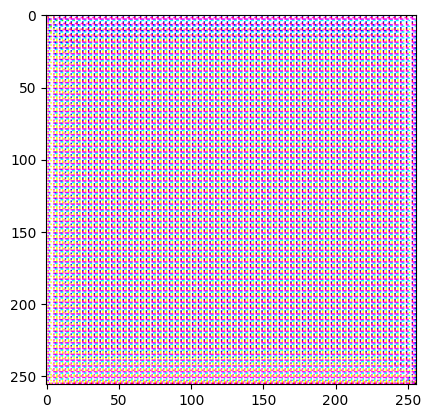

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


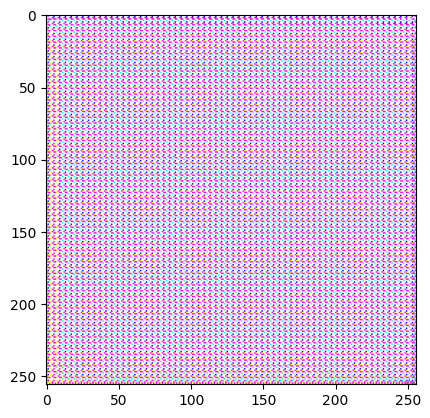

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


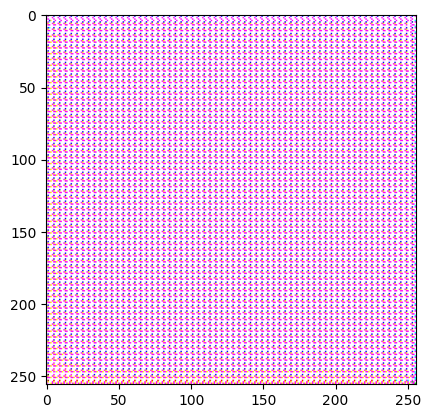

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


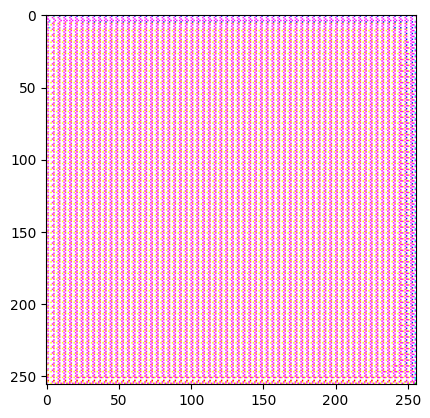

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


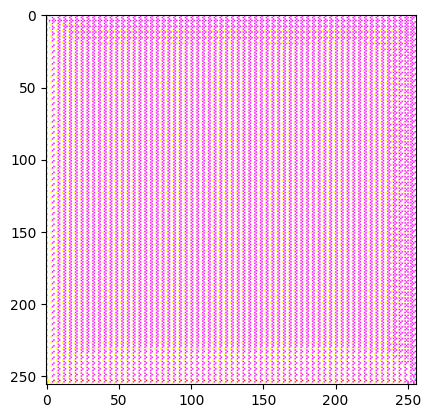

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


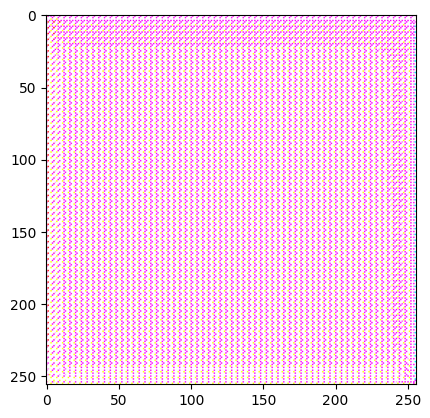

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


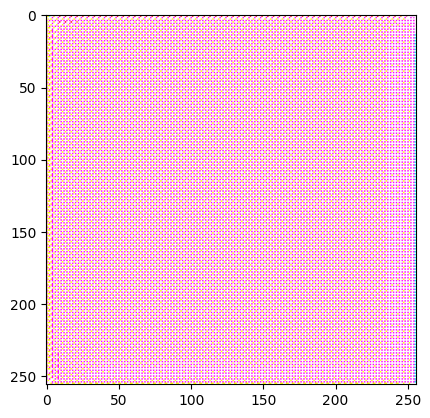

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Define the generator
def build_generator():
    inputs = layers.Input(shape=[256, 256, 3])
    
    # Downsampling
    x = layers.Conv2D(64, 7, strides=1, padding='same')(inputs)
    x = layers.ReLU()(x)
    x = layers.Conv2D(128, 3, strides=2, padding='same')(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(256, 3, strides=2, padding='same')(x)
    x = layers.ReLU()(x)
    
    # Bottleneck
    for _ in range(6):
        x = layers.Conv2D(256, 3, strides=1, padding='same')(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(256, 3, strides=1, padding='same')(x)
        x = layers.Add()([x, x])
    
    # Upsampling
    x = layers.Conv2DTranspose(128, 3, strides=2, padding='same')(x)
    x = layers.ReLU()(x)
    x = layers.Conv2DTranspose(64, 3, strides=2, padding='same')(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(3, 7, strides=1, padding='same')(x)
    
    outputs = layers.Activation('tanh')(x)
    return tf.keras.Model(inputs, outputs)

# Define the discriminator
def build_discriminator():
    inputs = layers.Input(shape=[256, 256, 3])
    
    x = layers.Conv2D(64, 4, strides=2, padding='same')(inputs)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(128, 4, strides=2, padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(256, 4, strides=2, padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(512, 4, strides=2, padding='same')(x)
    x = layers.LeakyReLU()(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(1)(x)
    
    return tf.keras.Model(inputs, x)

# Define the CycleGAN model
class CycleGAN(tf.keras.Model):
    def __init__(self, generator_g, generator_f, discriminator_x, discriminator_y, lambda_cycle=10.0):
        super(CycleGAN, self).__init__()
        self.generator_g = generator_g
        self.generator_f = generator_f
        self.discriminator_x = discriminator_x
        self.discriminator_y = discriminator_y
        self.lambda_cycle = lambda_cycle
        self.loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
        self.l1_loss = tf.keras.losses.MeanAbsoluteError()
    
    def compile(self, g_optimizer, f_optimizer, d_x_optimizer, d_y_optimizer):
        super(CycleGAN, self).compile()
        self.g_optimizer = g_optimizer
        self.f_optimizer = f_optimizer
        self.d_x_optimizer = d_x_optimizer
        self.d_y_optimizer = d_y_optimizer
    
    def train_step(self, data):
        real_x, real_y = data
        
        with tf.GradientTape() as tape:
            fake_y = self.generator_g(real_x, training=True)
            disc_fake_y = self.discriminator_y(fake_y, training=True)
            disc_real_y = self.discriminator_y(real_y, training=True)
            
            g_loss = self.loss_object(tf.ones_like(disc_fake_y), disc_fake_y)
            cycle_loss = self.l1_loss(real_x, self.generator_f(fake_y, training=True))
            total_g_loss = g_loss + self.lambda_cycle * cycle_loss
            
        grads = tape.gradient(total_g_loss, self.generator_g.trainable_variables)
        self.g_optimizer.apply_gradients(zip(grads, self.generator_g.trainable_variables))
        
        with tf.GradientTape() as tape:
            disc_fake_y = self.discriminator_y(fake_y, training=True)
            disc_real_y = self.discriminator_y(real_y, training=True)
            d_loss_y = self.loss_object(tf.ones_like(disc_real_y), disc_real_y) + \
                        self.loss_object(tf.zeros_like(disc_fake_y), disc_fake_y)
                        
        grads = tape.gradient(d_loss_y, self.discriminator_y.trainable_variables)
        self.d_y_optimizer.apply_gradients(zip(grads, self.discriminator_y.trainable_variables))
        
        with tf.GradientTape() as tape:
            fake_x = self.generator_f(real_y, training=True)
            disc_fake_x = self.discriminator_x(fake_x, training=True)
            disc_real_x = self.discriminator_x(real_x, training=True)
            d_loss_x = self.loss_object(tf.ones_like(disc_real_x), disc_real_x) + \
                        self.loss_object(tf.zeros_like(disc_fake_x), disc_fake_x)
                        
        grads = tape.gradient(d_loss_x, self.discriminator_x.trainable_variables)
        self.d_x_optimizer.apply_gradients(zip(grads, self.discriminator_x.trainable_variables))
        
        return {"g_loss": total_g_loss, "d_x_loss": d_loss_x, "d_y_loss": d_loss_y}

# Instantiate models
generator_g = build_generator()
generator_f = build_generator()
discriminator_x = build_discriminator()
discriminator_y = build_discriminator()

# Create the CycleGAN model
cyclegan = CycleGAN(generator_g, generator_f, discriminator_x, discriminator_y)

# Compile the CycleGAN model
cyclegan.compile(
    g_optimizer=tf.keras.optimizers.Adam(2e-4, beta_1=0.5),
    f_optimizer=tf.keras.optimizers.Adam(2e-4, beta_1=0.5),
    d_x_optimizer=tf.keras.optimizers.Adam(2e-4, beta_1=0.5),
    d_y_optimizer=tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
)

# Define a dummy dataset for demonstration
def load_dummy_data():
    # Create dummy data
    return (np.random.rand(1, 256, 256, 3).astype(np.float32),
            np.random.rand(1, 256, 256, 3).astype(np.float32))

# Train the model
for epoch in range(10):  # Example epoch range
    real_x, real_y = load_dummy_data()
    cyclegan.train_step((real_x, real_y))

    # Generate synthetic image
    synthetic_image = generator_g.predict(real_x)
    
    # Save synthetic image
    plt.imshow((synthetic_image[0] + 1) / 2)  # Rescale to [0, 1]
    plt.savefig('synthetic_image.png')
    plt.show()
